## **Data Science Intern - Lets Grow More**

## **Author - Priyangshu Sarkar**

## **Task - Prediction using Decision Tree Algorithm**

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df = df.drop(columns = ['Id'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df = df.rename(columns = {'SepalLengthCm': 'sepal_length', 'PetalLengthCm': 'petal_length', 'SepalWidthCm': 'sepal_width' , 'PetalWidthCm': 'petal_width' })

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
feature_cols = ['sepal_length' ,'sepal_width',  'petal_length',  'petal_width']

In [13]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
28,5.2,3.4,1.4,0.2,0
125,7.2,3.2,6.0,1.8,2
95,5.7,3.0,4.2,1.2,1
1,4.9,3.0,1.4,0.2,0
93,5.0,2.3,3.3,1.0,1
145,6.7,3.0,5.2,2.3,2
14,5.8,4.0,1.2,0.2,0
27,5.2,3.5,1.5,0.2,0
71,6.1,2.8,4.0,1.3,1


In [14]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# **DECISION TREE CLASSIFIER**



In [15]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [18]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100 , "%")

Accuracy: 97.77777777777777 %


In [22]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [23]:
dot_data = StringIO()

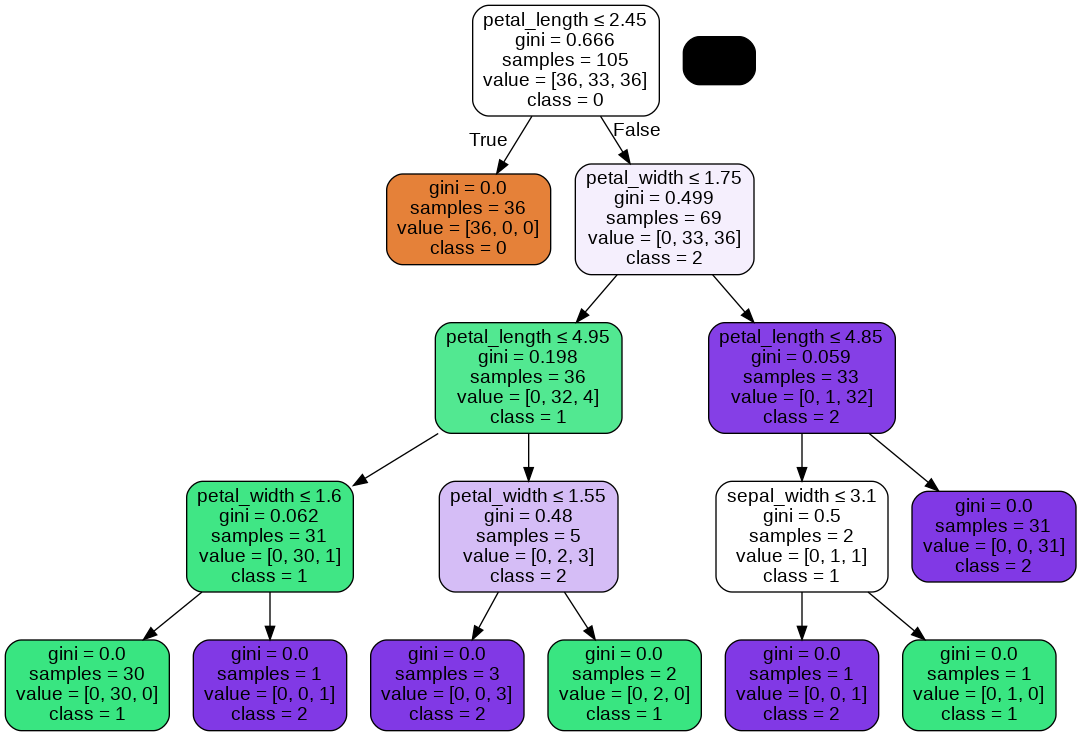

In [24]:
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris-classification.png')
Image(graph.create_png())